# Tutorial de Pandas

Pandas é a biblioteca do Python mais utilizada para trabalhar com conjuntos de dados de diferentes fontes de dados. \
Neste tutorial aprenderemos a como utilizá-la para extrair, transformar e carregar diversos tipos de dados.

Seu [código](https://github.com/pandas-dev/pandas) é aberto está hospedado no GitHub.  \
Sua [documentação](https://pandas.pydata.org/docs/), apesar de estar disponível somente em inglês, é bem completa e oferece tutoriais e exemplos.

In [2]:
%%html
<style>
table {float:left}
</style>

## Instalação

Caso você não tenha instalado o Pandas junto com os demais pacotes de Python (conforme explicado no [README.md](../README.md)), você pode instalá-lo usando o comando `pip`:

In [3]:
%pip install pandas  # NOTA: o símbolo de porcentagem no começo da linha permite você rodar comandos do terminal diretamente no notebook. 

Note: you may need to restart the kernel to use updated packages.


Para verificar se o Pandas foi instalado corretamente, tente importar ela e imprimir sua versão.

In [4]:
import pandas
pandas.__version__

'1.5.1'

Seguindo o padrão definido pelos desenvolvedores da biblioteca, utilizaremos as letras `pd` como pseudônimo para simplificar o nosso código. Assim, toda vez que quisermos utilizá-la não precisaremos escrever o nome dela completo (`pandas`), somente `pd`.

In [5]:
import pandas as pd
pd.__version__

'1.5.1'

## Introdução

>[Pandas](https://pandas.pydata.org/) é uma ferramenta de análise e manipulação de dados em código aberto rápida, poderosa, flexível e fácil de usar, 
construída sobre a linguagem de programação Python.


Essa biblioteca possui duas principais estruturas de dados: a coluna (_Series_) e a tabela (_DataFrame_).

## Series

### Series: declaração
Ao trabalhar com o Pandas, todas as colunas do seu conjunto de dados serão do tipo _Series_. Uma _Series_ também pode ser entendida como uma série ou sequência de dados. 
Você pode criar uma _Series_ na mão a partir de uma lista de Python. O exemplo abaixo mostra o número de mortes por Covid-19 a cada ano, de 2020 a 2023, de acordo com o 
[painel do Ministério da Saúde](https://infoms.saude.gov.br/extensions/covid-19_html/covid-19_html.html):

In [6]:
pd.Series([194950, 424110, 74800, 11320])

0    194950
1    424110
2     74800
3     11320
dtype: int64

No caso acima, declaramos de forma muito simples a nossa série de dados, mas mesmo assim o pandas adicionou os **índices** (0 a 3) e o **tipo de dados** (int64) da nossa coluna.
Algo interessante das _Series_ é que podemos criá-las definindo o seu nome, seus índices e qual será o seu tipo de dados:

In [7]:
covid_series = pd.Series([194950, 424110, 74800, 11320], 
    index=['Ano de 2020', 'Ano de 2021', 'Ano de 2022', 'Ano de 2023'], 
    name='obitos_por_covid', 
    dtype='int32'
)
covid_series

Ano de 2020    194950
Ano de 2021    424110
Ano de 2022     74800
Ano de 2023     11320
Name: obitos_por_covid, dtype: int32

No exemplo acima, optamos por índices que são strings. Nós poderíamos ter adotado índices inteiros, por exemplo: `[2020, 2021, 2022, 2023]`. 

O código abaixo mostra como obter essas propriedades das _Series_:

In [8]:
print('Índices: ', covid_series.index)
print('Nome: ', covid_series.name)
print('Tipo: ', covid_series.dtype)

Índices:  Index(['Ano de 2020', 'Ano de 2021', 'Ano de 2022', 'Ano de 2023'], dtype='object')
Nome:  obitos_por_covid
Tipo:  int32


In [9]:
covid_series.to_dict()

{'Ano de 2020': 194950,
 'Ano de 2021': 424110,
 'Ano de 2022': 74800,
 'Ano de 2023': 11320}

Também podemos criar _Series_ através de dicionários, assim as chaves e os valores do dicionário serão, respectivamente, os índices e os valores da coluna:

In [10]:
dict_series = pd.Series({'Ano de 2020': 194950, 'Ano de 2021': 424110, 'Ano de 2022': 74800, 'Ano de 2023': 11320})
dict_series

Ano de 2020    194950
Ano de 2021    424110
Ano de 2022     74800
Ano de 2023     11320
dtype: int64

In [11]:
# Dando um nome a uma Series já criada: 
dict_series.name = 'Mortes por covid'
dict_series

Ano de 2020    194950
Ano de 2021    424110
Ano de 2022     74800
Ano de 2023     11320
Name: Mortes por covid, dtype: int64

### Series: acessando elementos

A forma mais simples de acessar um elemento de uma _Series_ é informando seu índice:

In [12]:
# Pega um elemento da série:
n_obitos = covid_series['Ano de 2021']

# Mostra o tipo do elemento: 
print(type(n_obitos))

# Mostra o valor do elemento:
n_obitos

<class 'numpy.int32'>


424110

Você pode selecionar vários elementos passando uma lista de índices para a _Series_. Nesse caso, a _Series_ retorna uma **slice** (fatia), isto é, um pedaço da _Series_ original: 

In [13]:
covid_series[['Ano de 2023', 'Ano de 2021']]

Ano de 2023     11320
Ano de 2021    424110
Name: obitos_por_covid, dtype: int32

### Series: Métodos

O grande poder das Series estão em seus mais de 300 métodos. Como não podemos explicar todos aqui, vamos focar nos mais importantes. Mas lembre-se: para qualquer coisa que você queira fazer com uma série (selecionar elementos, transformá-los, etc.) é muito provável que exista um método para isso. Pesquise na [documentação](https://pandas.pydata.org/docs/), no [Google](http://www.google.com), [Stack Overflow](https://stackoverflow.com/) ou pergunte ao [ChatGPT](https://chat.openai.com/).

Para exemplificar alguns métodos, vamos carregar dados sobre o desmatamento anual da floresta amazônica brasileira, 
obtidos por imagens de satélite do Instituto Nacional de Pesquisas Espaciais (INPE) aqui: <http://terrabrasilis.dpi.inpe.br/app/dashboard/deforestation/biomes/legal_amazon/rates>.

In [39]:
# Carrega Series com área desmatada na Amazônia, em quilômetros quadrados, em cada ano:
desmatamento = pd.read_csv('../90_dados/desmatamento_INPE/terrabrasilis_legal_amazon_16_12_2023.csv', index_col=0)['area_km2']

#### Series: Selecionando elementos

Podemos selecionar o começo e o final da série com os métodos `head` e `tail`:

In [42]:
desmatamento.head()

ano
1988    21050.0
1989    17770.0
1990    13730.0
1991    11030.0
1992    13786.0
Name: area_km2, dtype: float64

In [43]:
desmatamento.tail(7)

ano
2017     6947.0
2018     7536.0
2019    10129.0
2020    10851.0
2021    13038.0
2022    11594.0
2023     9001.0
Name: area_km2, dtype: float64

Podemos selecionar elementos a partir da sua posição na Series com o método `iloc`. Esse método funciona com a mesma lógica que a seleção de elementos de uma lista de Python.

In [46]:
desmatamento.iloc[5:8]

ano
1993    14896.0
1994    14896.0
1995    29059.0
Name: area_km2, dtype: float64

Também podemos selecionar elementos de uma Series a partir de seus índices. Para isso utilizamos o método `loc`. Vamos selecionar os anos anteriores ao lançamento do [Plano de Ação para Prevenção e Controle do Desmatamento na Amazônia Legal](https://www.gov.br/mma/pt-br/assuntos/prevencao-e-controle-do-desmatamento/amazonia-ppcdam-1) (PPCDAm), feito em 2004. Note que, quando utilizamos a seleção por índice (ou seja, o método `loc`), o final da seleção é incluído:

In [52]:
desmatamento.loc[1988:2003]

ano
1988    21050.0
1989    17770.0
1990    13730.0
1991    11030.0
1992    13786.0
1993    14896.0
1994    14896.0
1995    29059.0
1996    18161.0
1997    13227.0
1998    17383.0
1999    17259.0
2000    18226.0
2001    18165.0
2002    21650.0
2003    25396.0
Name: area_km2, dtype: float64

Vemos que, do início do programa PRODES do INPE (de coleta de dados sobre o desmatamento) até antes do PPCDAm, cerca de 13 mil $\mathrm{km^2}$ ou mais de floresta eram derrubados por ano, com grande variação de ano a ano. No ano de 2003, esse número chegou a mais de 25 mil $\mathrm{km^2}$.

Vamos selecionar os 7 primeiros anos do programa PPCDAm a partir de uma lista de índices:

In [53]:
desmatamento.loc[[2004, 2005, 2006, 2007, 2008, 2009, 2010]]

ano
2004    27772.0
2005    19014.0
2006    14286.0
2007    11651.0
2008    12911.0
2009     7464.0
2010     7000.0
Name: area_km2, dtype: float64

Vemos que, após a implementação do PPCDAm, houve uma queda grande no ritmo do desmatamento.

O método `loc` também funciona com uma lista booleana que informa se o elemento naquela posição deve ser selecionado. Nesse caso, o tamanho da lista precisa ser igual ao da Series:

In [62]:
# Lista que diz se cada elemento da Series `desmatamento` pertence ao 1o governo da Dilma Rouseff:
gov_dilma1 = [False, False, False, False, False, False, False, False, False, False, False, False, 
              False, False, False, False, False, False, False, False, False, False, False, True, 
              True, True, True, False, False, False, False, False, False, False, False, False]
assert len(gov_dilma1) == len(desmatamento)

In [63]:
desmatamento.loc[gov_dilma1]

ano
2011    6418.0
2012    4571.0
2013    5891.0
2014    5012.0
Name: area_km2, dtype: float64

A vantagem dessa estratégia é que podemos selecionar elementos da lista a partir de critérios. 
Por exemplo, vamos criar uma nova Series que diz se o desmatamento ficou abaixo de 10 mil $\mathrm{km^2}$ ou não:

In [69]:
menosde10 = desmatamento < 10000
menosde10

ano
1988    False
1989    False
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009     True
2010     True
2011     True
2012     True
2013     True
2014     True
2015     True
2016     True
2017     True
2018     True
2019    False
2020    False
2021    False
2022    False
2023     True
Name: area_km2, dtype: bool

Agora podemos usar essa Series booleana para selecionar os elementos da Series `desmatamento`:

In [70]:
desmatamento[menosde10]

ano
2009    7464.0
2010    7000.0
2011    6418.0
2012    4571.0
2013    5891.0
2014    5012.0
2015    6207.0
2016    7893.0
2017    6947.0
2018    7536.0
2023    9001.0
Name: area_km2, dtype: float64

Outro exemplo que utiliza a mesma estratégia: vamos selecionar o segundo governo da Dilma Rouseff, até o golpe de 2016:

In [71]:
# Aqui combinamos duas condições com a operação lógica "E". Para isso usamos o símbolo "&":  
desmatamento.loc[(desmatamento.index >= 2015) & (desmatamento.index <= 2016)]

ano
2015    6207.0
2016    7893.0
Name: area_km2, dtype: float64

#### Series: medidas agregadas

Para uma Series, podemos calcular coisas como a média, valor máximo, valor mínimo, mediana, desvio padrão, entre outros. Vamos demonstrar algumas dessas coisas:

In [72]:
# Média de desmatamento antes do PPCDAm:
desmatamento.loc[:2003].mean()

17855.25

Vamos comparar com a média do desmatamento durante o PPCDAm (até antes de sua revogação, pelo governo federal, em 2019):

In [75]:
# Média do desmatamento durante o PPCDAm:
desmatamento.loc[2004:2018].mean()

10038.2

Também podemos ver qual foi o maior ritmo de desmatamento de 1988 a 2023:

In [77]:
desmatamento.max()

29059.0

E podemos achar o mínimo e o ano no qual ele ocorreu:

In [78]:
desmatamento.loc[desmatamento == desmatamento.min()]

ano
2012    4571.0
Name: area_km2, dtype: float64

#### Series: gráficos

In [81]:
# Para poder formatar melhor os gráficos:
import matplotlib.pyplot as pl

Fazer gráficos com os dados de uma Series é fácil:

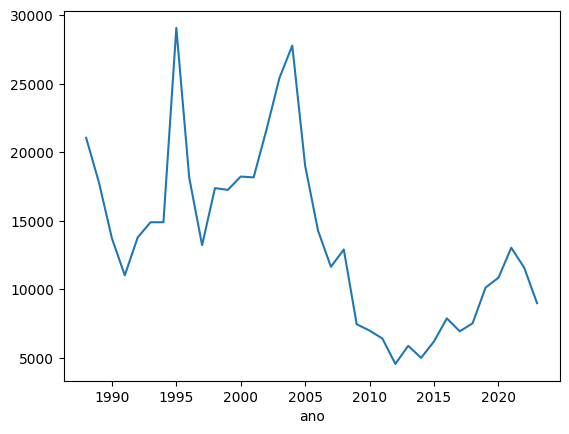

In [83]:
# Criando um gráfico a partir de uma Série. O eixo X contém os índices e o eixo Y contém os valores da Series:
desmatamento.plot();

Os gráficos podem ser formatados e anotados para melhorar o entendimento das pessoas:

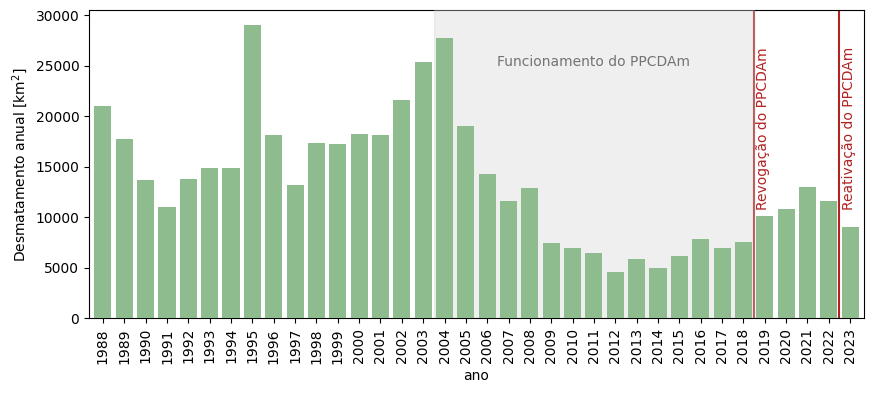

In [123]:
# Criando uma figura com o pyplot, para poder definir seu tamanho:
pl.figure(figsize=(10,4))

# Criando um gráfico de barra, com algumas formatações:
desmatamento.plot(kind='bar', width=0.8, color='darkseagreen', zorder=10);

# MAIS FORMATAÇÃO:

# Rótulo do eixo Y:
pl.ylabel('Desmatamento anual [$\mathrm{km^2}$]')

# Faixa cinza marcando período importante:
pl.axvspan(2003.5 - 1988, 2018.5 - 1988, color='0.8', alpha=0.3, zorder=5)

# Texto explicando a faixa cinza:
pl.text(2011 - 1988, 25000, 'Funcionamento do PPCDAm', ha='center', color='0.3')

# Linha vertical vermelha marcando momento importante:
pl.axvline(2018.5 - 1988, color='firebrick')
pl.text(2018.6 - 1988, 11000, 'Revogação do PPCDAm', color='firebrick', rotation=90, fontsize=10)
# Linha vertical vermelha marcando momento importante:
pl.axvline(2022.5 - 1988, color='firebrick')
pl.text(2022.6 - 1988, 11000, 'Reativação do PPCDAm', color='firebrick', rotation=90, fontsize=10)

pl.show()

#### Series: alterando elementos

## Dataframes